In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/immobilier.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


On souhaite prédire la colonne "SalePrice". Donc toutes les autres colonnes sont des variables à faire apprendre

In [172]:
features = [col for col in  data.columns if col not in "SalePrice"]

In [173]:
features

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [174]:
train = data[features]
y = data.SalePrice
#y = data['SalePrice']

In [175]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [176]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

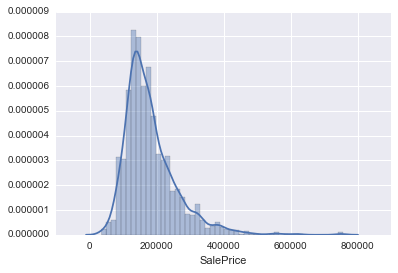

In [177]:
sns.distplot(y)

In [131]:
# Modele pour la regression
from sklearn.linear_model import Ridge

In [49]:
import sklearn

In [50]:
sklearn.__version__

'0.18.1'

In [181]:
# Initialisation du model
model_ridge = Ridge()

In [182]:
# 1) On fait apprendre le model
model_ridge.fit(train, y)

# Error ...

ValueError: could not convert string to float: Normal

Le model peux prendre en entré que des chiffre, il faut donc transformer les données en string en chiffre

In [183]:
data['SaleCondition'].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [184]:
pd.get_dummies(data['SaleCondition'], prefix="SaleCondition").head()

,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [185]:
def prepare_data(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"] # 80 col
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train)
    
    return train, y

In [186]:
train, y = prepare_data(data.copy())

In [187]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [188]:
# 2) On fait apprendre le model
model_ridge.fit(train, y)

# Error ...

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [189]:
data.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Il y a des données manquante qui ne peuvent pas etre prisent en compte par la modèle, il faut donc les remplacer 

In [190]:
pd.isnull(data).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [191]:
def prepare_data(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [192]:
train, y = prepare_data(data.copy())

In [193]:
# 3) On fait apprendre le model
model_ridge.fit(train, y)

# yeah !!!

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Compréhension du Score de performance de notre modèle :

In [5]:
from sklearn.metrics import mean_absolute_error

In [195]:
vrai = np.array([1000, 2000, 1500])
prediction = np.array([900, 2200, 1300])   # classic
#prediction = np.array([990, 2005, 1500])   # Best
#prediction = np.array([9000, 22000, 13000])    # Bad

In [196]:
mean_absolute_error(vrai, prediction)

166.66666666666666

In [197]:
1000 - 900

100

In [198]:
2000 - 2200

-200

In [199]:
1500 - 1300

200

In [200]:
(100 + 200 + 200) / 3.0

166.66666666666666

### Contruction de notre stratégie de Cross - Validation

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
def cross_validation(model, train, y, cv=5):
    mae = -cross_val_score(model, train, y, scoring="neg_mean_absolute_error", cv = cv)
    return mae

In [203]:
score = cross_validation(model_ridge, train, y)
print score

[ 17781.7821806   19834.62785741  19109.55973426  17004.7525164
  19526.64170021]


In [204]:
score.mean(), score.std()

(18651.472797776139, 1081.0799784470737)

In [205]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Voila notre 1er score** !!

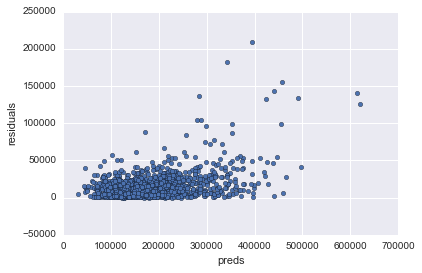

In [206]:
preds = pd.DataFrame({"preds":model_ridge.predict(train), "true":y})
preds["residuals"] = np.abs(preds["true"] - preds["preds"])
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [207]:
preds[preds.residuals >150000]

,preds,true,residuals
523,393778.481732,184750,209028.481732
898,456930.415789,611657,154726.584211
1298,341589.949296,160000,181589.949296


In [208]:
data.shape

(1460, 81)

In [209]:
def prepare_data_outlier(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train)
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    return train, y

In [210]:
train, y = prepare_data_outlier(data.copy())
print train.shape, y.shape

(1457, 288) (1457,)


In [211]:
score = cross_validation(model_ridge, train, y)
print score.mean()

16905.6301599


In [213]:
train, y = prepare_data(data.copy())
print train.shape, y.shape

(1460, 289) (1460,)


In [214]:
score = cross_validation(model_ridge, train, y)
print score.mean()

18651.4727978


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

NameError: name 'train' is not defined

In [216]:
print"X_train : " + str(X_train.shape)
print"X_validation : " + str(X_validation.shape)
print"y_train : " + str(y_train.shape)
print"y_validation : " + str(y_validation.shape)

X_train : (1095, 289)
X_validation : (365, 289)
y_train : (1095,)
y_validation : (365,)


In [217]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [218]:
mes_predictions = model_ridge.predict(X_validation)

In [219]:
# Mes prédiction
mes_predictions[0:5]

array([ 123579.7980259 ,  130806.08380828,  189586.80408004,
        214612.50594791,  275183.97258377])

In [220]:
# Les vrai valeurs 
y_validation[0:5]

140     115000
950     129000
248     180000
1360    189000
568     316600
Name: SalePrice, dtype: int64

In [221]:
mean_absolute_error(y_validation, mes_predictions)

20154.930350137409

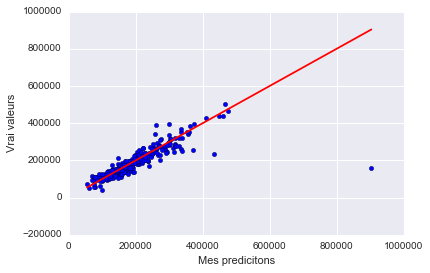

In [222]:
plt.scatter(mes_predictions, y_validation)
plt.plot([min(mes_predictions),max(mes_predictions)], [min(mes_predictions),max(mes_predictions)], c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

Une valeur semble complétement perdu; on prédit 900.000 alors qu'elle devrait etre à moins de 200.000 ...

In [223]:
analyse = X_validation.copy()

In [224]:
analyse.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
140,141,20,70.0,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,0,0,1,0
950,951,20,60.0,7200,5,8,1950,2002,0.0,398,...,0,0,0,1,0,0,0,0,1,0
248,249,60,72.0,11317,7,5,2003,2003,101.0,0,...,0,0,0,1,0,0,0,0,1,0
1360,1361,70,51.0,9842,5,6,1921,1998,0.0,0,...,0,0,0,1,0,0,0,0,1,0
568,569,50,79.0,12327,8,8,1983,2009,0.0,1441,...,0,0,0,1,0,0,0,0,1,0


In [225]:
analyse['prix'] = y_validation

In [226]:
analyse.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prix
140,141,20,70.0,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,0,1,0,115000
950,951,20,60.0,7200,5,8,1950,2002,0.0,398,...,0,0,1,0,0,0,0,1,0,129000
248,249,60,72.0,11317,7,5,2003,2003,101.0,0,...,0,0,1,0,0,0,0,1,0,180000
1360,1361,70,51.0,9842,5,6,1921,1998,0.0,0,...,0,0,1,0,0,0,0,1,0,189000
568,569,50,79.0,12327,8,8,1983,2009,0.0,1441,...,0,0,1,0,0,0,0,1,0,316600


In [227]:
analyse['prediction'] = mes_predictions

In [228]:
analyse.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prix,prediction
140,141,20,70.0,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,1,0,115000,123579.798026
950,951,20,60.0,7200,5,8,1950,2002,0.0,398,...,0,1,0,0,0,0,1,0,129000,130806.083808
248,249,60,72.0,11317,7,5,2003,2003,101.0,0,...,0,1,0,0,0,0,1,0,180000,189586.804080
1360,1361,70,51.0,9842,5,6,1921,1998,0.0,0,...,0,1,0,0,0,0,1,0,189000,214612.505948
568,569,50,79.0,12327,8,8,1983,2009,0.0,1441,...,0,1,0,0,0,0,1,0,316600,275183.972584


In [229]:
analyse[analyse.prediction >= 800000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prix,prediction
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,0,0,0,0,0,0,0,1,160000,903754.455156


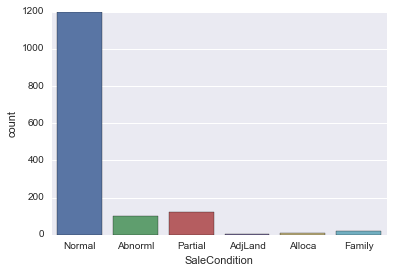

In [230]:
sns.countplot(data.SaleCondition)

### transformation de notre Prix pour améliorer le score : 

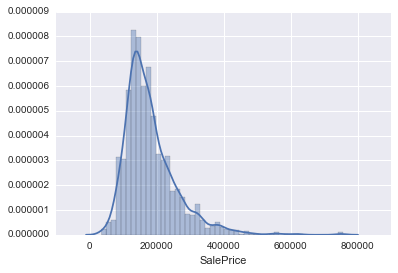

In [231]:
sns.distplot(data.SalePrice)

In [232]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

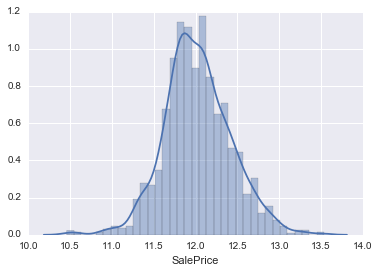

In [233]:
sns.distplot(np.log1p(data.SalePrice))

In [234]:
np.log1p(data.SalePrice).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [235]:
def prepare_data_log(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [236]:
train, y = prepare_data_log(data)

In [237]:
score = cross_validation(model_ridge, train, y)
print score.mean()

0.0902204189461


In [238]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [239]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [240]:
mes_predictions = model_ridge.predict(X_validation)

In [241]:
mes_predictions[0:5]

array([ 11.56322985,  11.84090375,  12.16291362,  12.18622392,  12.50288167])

In [242]:
# Les vrai valeurs 
y_validation[0:5]

140     11.652696
950     11.767575
248     12.100718
1360    12.149508
568     12.665398
Name: SalePrice, dtype: float64

In [243]:
mean_absolute_error(y_validation, mes_predictions)

0.090238412085009004

In [244]:
mes_predictions_exp = np.expm1(mes_predictions)
y_validation_exp = np.expm1(y_validation)

In [245]:
# Redonner les valeurs un transformation normal (exp)
mean_absolute_error(y_validation_exp, mes_predictions_exp)

20652.779026301429

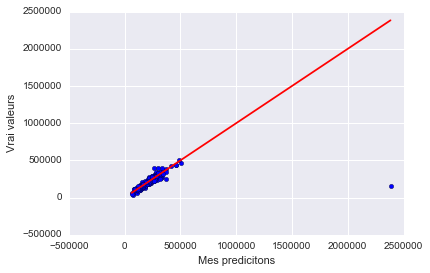

In [246]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

In [247]:
def prepare_data_outlier_log(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [248]:
train, y = prepare_data_outlier_log(data.copy())

In [249]:
score = cross_validation(model_ridge, train, y)
print score.mean()

0.0828581382524


In [250]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [251]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [252]:
mes_predictions = model_ridge.predict(X_validation)

In [253]:
mes_predictions[0:5]

array([ 11.48383154,  11.69299838,  12.16844758,  11.7510565 ,  11.87693117])

In [254]:
# Les vrai valeurs 
y_validation[0:5]

140    11.652696
951    11.694422
248    12.100718
738    12.095147
569    11.820123
Name: SalePrice, dtype: float64

In [255]:
mes_predictions_exp = np.expm1(mes_predictions)
y_validation_exp = np.expm1(y_validation)

In [256]:
# Redonner les valeurs un transformation normal (exp)
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13946.253895956104

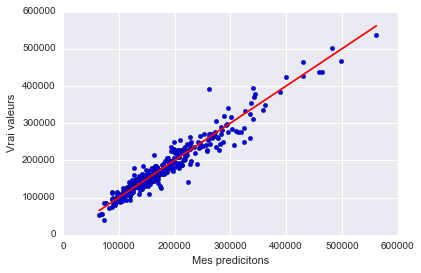

In [257]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

# Paramettre d'un modèle 

In [130]:
model_ridge = Ridge()

NameError: name 'Ridge' is not defined

In [259]:
model_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [260]:
#alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas = [10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16]
cv_ridge = [cross_validation(Ridge(alpha = alpha ,random_state=42), train, y).mean() 
            for alpha in alphas]

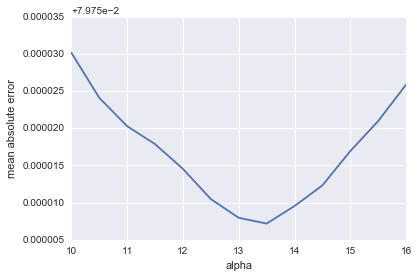

In [261]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()
plt.xlabel("alpha")
plt.ylabel("mean absolute error")

In [262]:
cv_ridge.argmin()

13.5

In [263]:
cv_ridge

10.0    0.079780
10.5    0.079774
11.0    0.079770
11.5    0.079768
12.0    0.079765
12.5    0.079760
13.0    0.079758
13.5    0.079757
14.0    0.079760
14.5    0.079762
15.0    0.079767
15.5    0.079771
16.0    0.079776
dtype: float64

In [265]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.079757180837


In [266]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [267]:
model_ridge = Ridge(alpha=13.5, random_state=42)
model_ridge.fit(X_train, y_train)

Ridge(alpha=13.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [268]:
mes_predictions_exp = np.expm1(model_ridge.predict(X_validation))

In [269]:
y_validation_exp = np.expm1(y_validation)

In [270]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13713.683434371746

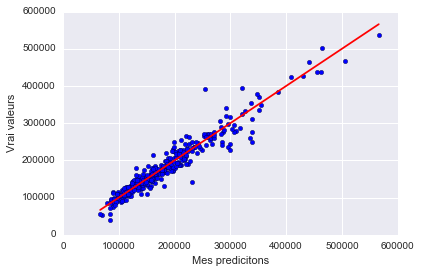

In [271]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

## Aller plus loin : 

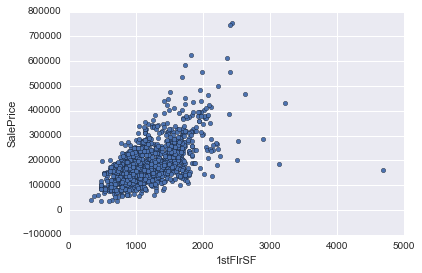

In [104]:
data.plot(kind='scatter', x="1stFlrSF", y='SalePrice')

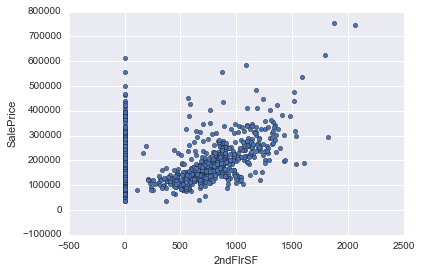

In [276]:
data.plot(kind='scatter', x="2ndFlrSF", y='SalePrice')

In [277]:
data['1stFlr_2ndFlr_Sf'] = data['1stFlrSF'] + data['2ndFlrSF']

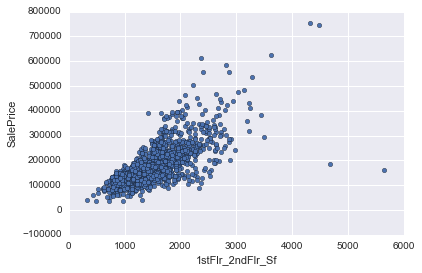

In [278]:
data.plot(kind='scatter', x="1stFlr_2ndFlr_Sf", y='SalePrice')

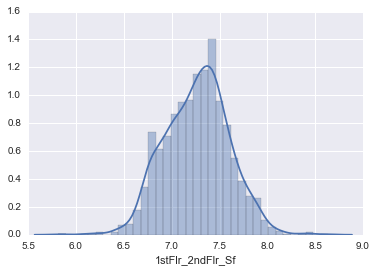

In [280]:
sns.distplot(np.log1p(data['1stFlr_2ndFlr_Sf']))

In [108]:
data[(data['1stFlr_2ndFlr_Sf'] > 4000) & (data.SalePrice <= 700000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1stFlr_2ndFlr_Sf
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,4676
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,5642


In [320]:
def prepare_data_outlier_log_plus(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    
    # Ajout de nouvelle variables
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [321]:
train, y = prepare_data_outlier_log_plus(data.copy())

(1457, 289)


In [322]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0792999760212


In [323]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [324]:
model_ridge = Ridge(alpha=13.5, random_state=42)
model_ridge.fit(X_train, y_train)

Ridge(alpha=13.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [325]:
mes_predictions_exp = np.expm1(model_ridge.predict(X_validation))

In [326]:
y_validation_exp = np.expm1(y_validation)

In [327]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13595.418391239062

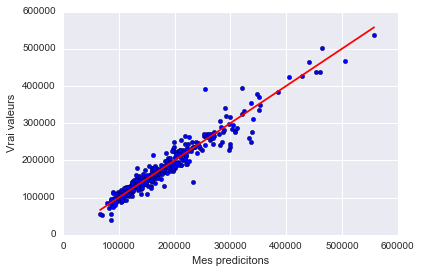

In [328]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

In [329]:
model_ridge.coef_[0:10]

array([ -1.17526078e-05,  -1.62168730e-04,   4.23445411e-04,
         2.34264991e-06,   4.67261807e-02,   4.41918434e-02,
         2.01984717e-03,   5.90569796e-04,   4.30867731e-06,
         5.59029977e-05])

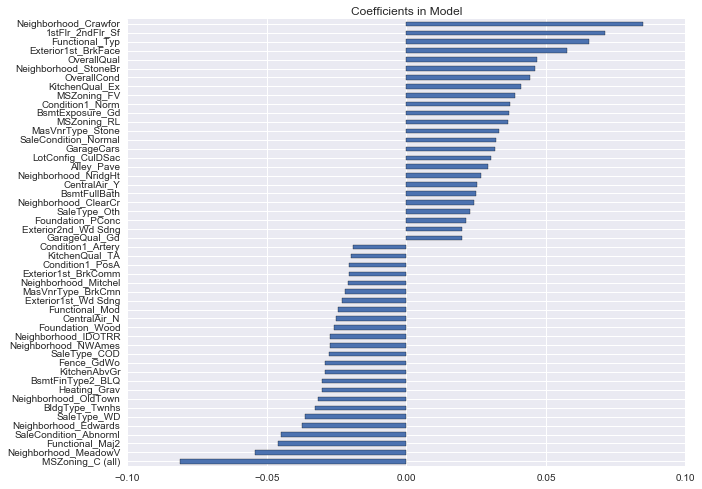

In [330]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
# On prend les 10 plus important features postive et négative
nb_important = 25
imp_coef = pd.concat([coef.sort_values().head(nb_important),
                     coef.sort_values().tail(nb_important)])
imp_coef.plot(kind = "barh", figsize=(10, 8))
plt.title("Coefficients in Model")

## Encore plus loin : 

In [61]:
# Pour afficher des images (pas besoin de taper cet import)
from IPython.display import Image

In [45]:
data[['YearBuilt', 'GarageYrBlt']].head()

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0


In [46]:
df = data.copy() # To work on df with no change in Daframe data

In [47]:
df['build_home_garage_same_year'] = 0
df.loc[data['YearBuilt'] == data['GarageYrBlt'], 'build_home_garage_same_year'] = 1

In [48]:
df.build_home_garage_same_year.value_counts()

1    1089
0     371
Name: build_home_garage_same_year, dtype: int64

In [297]:
def prepare_data_outlier_log_plus_2(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data['build_home_garage_same_year'] = "N"
    data.loc[data['YearBuilt'] == data['GarageYrBlt'], 'build_home_garage_same_year'] = "Y"
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [298]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [50]:
data.shape

(1460, 81)

In [317]:
train, y = prepare_data_outlier_log_plus_2(data.copy())

(1457, 291)


In [318]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0794684185071


In [35]:
# Best was 0.0794542370234 donc ce n'est pas positif comme features

Toujours tester un ajout de features pour savoir si celle-ci va avoir un impact positif ou négatif

### Regardons la colonnes "MasVnrArea"  & "MasVnrType" :

In [309]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [310]:
df.MasVnrType.head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [357]:
#df.MasVnrArea.value_counts()

In [312]:
df.shape

(1460, 82)

In [313]:
df[df.MasVnrType == "None"].MasVnrArea.value_counts()

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [331]:
def prepare_data_outlier_log_plus_3(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [332]:
train, y = prepare_data_outlier_log_plus_3(data.copy())

(1457, 289)


In [333]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0793025166395


In [64]:
Image(url="http://i.giphy.com/GPq3wxmLbwUGA.gif")

### BsmtFinType1 & BsmtFinSF1 / BsmtFinType2 & BsmtFinSF2

In [341]:
df.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [343]:
df.BsmtFinSF2.describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [344]:
df[pd.isnull(df.BsmtFinType2)].BsmtFinSF2.value_counts()

0      37
479     1
Name: BsmtFinSF2, dtype: int64

In [354]:
def prepare_data_outlier_log_plus_4(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0
    
    data.loc[pd.isnull(data.BsmtFinType2), 'BsmtFinSF2'] = 0
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [355]:
train, y = prepare_data_outlier_log_plus_4(data.copy())

(1457, 289)


In [356]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0792739925963


In [230]:
X_train_ridge, X_validation_ridge, y_train_ridge, y_validation_ridge = train_test_split(train, y, random_state = 3)

In [231]:
model_ridge = Ridge(alpha=13.5, random_state=42)
model_ridge.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=13.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

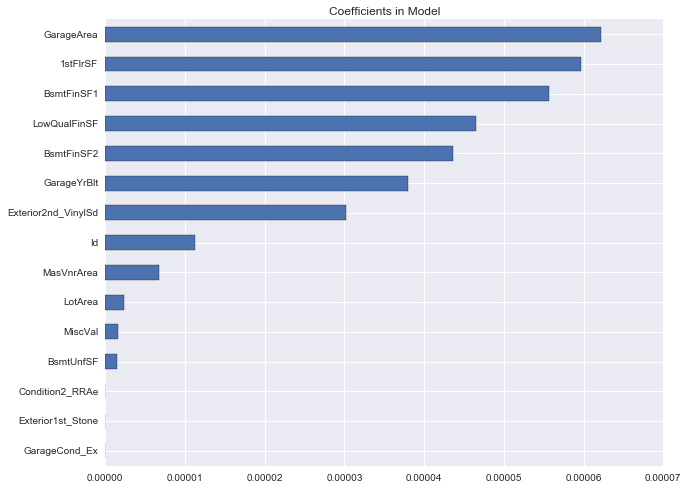

In [137]:
coef = pd.Series(np.abs(model_ridge.coef_), index = X_train.columns)
# On prend les 10 plus important features postive et négative
nb_important = 15
#imp_coef = pd.concat([coef.sort_values().head(nb_important),
           #          coef.sort_values().tail(nb_important)])
    
imp_coef = coef.sort_values().head(nb_important)
imp_coef.plot(kind = "barh", figsize=(10, 8))
plt.title("Coefficients in Model")

In [367]:
coef.sort_values().head(10)

GarageCond_Ex        0.000000
Condition2_RRAe      0.000000
Exterior1st_Stone    0.000000
MiscFeature_TenC     0.000000
MiscVal              0.000001
BsmtUnfSF            0.000002
LotArea              0.000002
MasVnrArea           0.000003
GarageYrBlt          0.000007
Id                   0.000012
dtype: float64

In [368]:
features_to_delete = ["GarageCond_Ex",
"Condition2_RRAe",
"Exterior1st_Stone",
"MiscFeature_TenC",
"MiscVal",
"BsmtUnfSF",
"LotArea",
"MasVnrArea",
"GarageYrBlt",
"Id"]

In [369]:
def prepare_data_outlier_log_plus_4_bis(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0
    
    data.loc[pd.isnull(data.BsmtFinType2), 'BsmtFinSF2'] = 0
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    train = train.drop(features_to_delete, axis=1)
    
    print train.shape

    return train, y

In [370]:
train, y = prepare_data_outlier_log_plus_4_bis(data.copy())

(1457, 279)


In [371]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0800835352745


In [375]:
#pd.isnull(df).sum()

In [376]:
df.shape

(1460, 82)

In [122]:
column_detail = pd.DataFrame(pd.isnull(df).sum(), columns=['nbr_null'])
column_detail.sort_values('nbr_null', ascending=0, inplace=True)
column_detail.head(10)

,nbr_null
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageCond,81
GarageQual,81


In [227]:
def prepare_data_outlier_log_plus_5(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0
    
    data.loc[pd.isnull(data.BsmtFinType2), 'BsmtFinSF2'] = 0
    
    #Drop features with too much Null value
    data = data.drop('PoolQC', axis=1)
    data = data.drop('MiscFeature', axis=1)
    data = data.drop('Alley', axis=1)
    data = data.drop('Fence', axis=1)
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [228]:
train, y = prepare_data_outlier_log_plus_5(data.copy())

(1457, 276)


In [134]:
score = cross_validation(Ridge(alpha=13.5, random_state=42), train, y)
print score.mean()

0.0787093812383


In [380]:
Image(url="http://i.giphy.com/LZfZXcFNOOzw4.gif")

## Let's talk about Tree now : 

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
np.random.seed(42)

In [74]:
dt = DecisionTreeRegressor(random_state=0)

In [75]:
def dt_prepare_data(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [76]:
train, y = dt_prepare_data(data.copy())

(1460, 80)


In [77]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [78]:
# 1) On fait apprendre le model
dt.fit(train, y)

#Error...

ValueError: could not convert string to float: Normal

In [97]:
from sklearn.preprocessing import LabelEncoder

Problème avec nos données en string...

In [98]:
categoricals = [x for x in data.columns if data[x].dtype == 'object']

In [99]:
categoricals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [100]:
data.SaleCondition.head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [101]:
lbl = LabelEncoder() # Initialisation
lbl.fit(data['SaleCondition'].values)
test = lbl.transform(data['SaleCondition'].values)

In [102]:
test[0:5]

array([4, 4, 4, 0, 4])

On change chaque valeur en string en valeur numérique

In [103]:
def dt_prepare_data_plus(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    
    # String problem
    categoricals = [x for x in train.columns if train[x].dtype == 'object']
    for col in categoricals:
        lbl = LabelEncoder()
        lbl.fit(train[col].values)
        train[col] = lbl.transform(train[col].values)
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [104]:
train, y = dt_prepare_data_plus(data.copy())

/Users/babou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1460, 80)


In [105]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,0,12,2008,8,4


In [106]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
score = cross_validation(dt, train, y)
print score.mean()

27604.8239726


In [109]:
def dt_prepare_data_plus_log(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # String problem
    categoricals = [x for x in train.columns if train[x].dtype == 'object']
    for col in categoricals:
        lbl = LabelEncoder()
        lbl.fit(train[col].values)
        train[col] = lbl.transform(train[col].values)
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [110]:
train, y = dt_prepare_data_plus_log(data.copy())

/Users/babou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1460, 80)


In [112]:
score = cross_validation(dt, train, y)
print score.mean()

0.147558095984


In [113]:
from sklearn.ensemble import RandomForestRegressor


In [114]:
rfr = RandomForestRegressor(random_state=0)

In [115]:
score = cross_validation(rfr, train, y)
print score.mean()

0.104381544338


In [149]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [150]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [151]:
mes_predictions_exp = np.expm1(rfr.predict(X_validation))

In [152]:
mes_predictions_exp[0:5]

array([ 103319.91975369,  135961.29972815,  202308.67619832,
        132864.2976212 ,  124147.72343506])

In [36]:
y_validation_exp = np.exp(y_validation)

In [122]:
y_validation_exp[0:5]

140     115001.0
950     129001.0
248     180001.0
1360    189001.0
568     316601.0
Name: SalePrice, dtype: float64

In [123]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

19435.848209734722

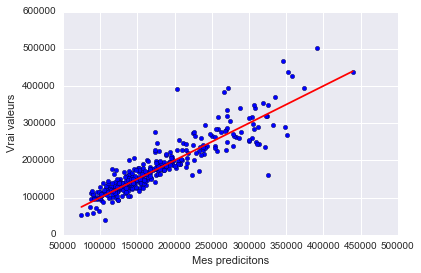

In [124]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

In [147]:
def dt_prepare_data_plus_log_1(data):
    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0
    
    data.loc[pd.isnull(data.BsmtFinType2), 'BsmtFinSF2'] = 0
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # String problem
    categoricals = [x for x in train.columns if train[x].dtype == 'object']
    for col in categoricals:
        lbl = LabelEncoder()
        lbl.fit(train[col].values)
        train[col] = lbl.transform(train[col].values)
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [148]:
train, y = dt_prepare_data_plus_log_1(data.copy())

/Users/babou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1457, 81)


In [127]:
score = cross_validation(rfr, train, y)
print score.mean()

0.103007546782


In [160]:
pd.DataFrame?

In [165]:
coef = pd.DataFrame({'col' : X_train.columns,'importance' : rfr.feature_importances_})
coef = coef.sort_values('importance', ascending=False)
top_tree_features = coef.col.head(25)
#plt.figure(figsize=(10, 5))
#coef.head(25).plot(kind='bar')
#plt.title('Feature Significance')

In [167]:
top_tree_features

17         OverallQual
80    1stFlr_2ndFlr_Sf
38         TotalBsmtSF
43            1stFlrSF
19           YearBuilt
61          GarageCars
46           GrLivArea
4              LotArea
62          GarageArea
34          BsmtFinSF1
18         OverallCond
2             MSZoning
3          LotFrontage
41          CentralAir
24         Exterior2nd
12        Neighborhood
30            BsmtQual
20        YearRemodAdd
37           BsmtUnfSF
67         OpenPorchSF
59         GarageYrBlt
66          WoodDeckSF
44            2ndFlrSF
1           MSSubClass
0                   Id
Name: col, dtype: object

In [173]:
coef_ridge = pd.DataFrame({'col' : X_train.columns,
                           'importance' : model_ridge.coef_})
coef_ridge[coef_ridge.col.isin(list(top_tree_features))].shape

    
#imp_coef = coef.sort_values().head(nb_important)
#imp_coef.plot(kind = "barh", figsize=(10, 8))
#plt.title("Coefficients in Model")

(20, 2)

In [175]:
coef_ridge.tail()

,col,importance
271,SaleCondition_AdjLand,0.011574
272,SaleCondition_Alloca,-0.004819
273,SaleCondition_Family,-0.008842
274,SaleCondition_Normal,0.031992
275,SaleCondition_Partial,0.015414


In [183]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [184]:
score = cross_validation(rfr, train, y)
print score.mean()

0.0948377547648


In [185]:
RandomForestRegressor?

In [204]:
cv_rfr = []
n_estimators = [10, 50, 100, 200]
max_depths = [3, 5, 7]


for n_estimator in n_estimators:
    for max_depth in max_depths:
        print "Je lance n_estimator : " + str(n_estimator) + " et "+str(max_depth) + " max_depth."
        score = cross_validation(RandomForestRegressor(n_estimators=n_estimator,
                                                       max_depth=max_depth,
                                                       random_state=0), train, y).mean() 
        cv_rfr.append({'n_estimator' : n_estimator,
                       'max_depths' : max_depth,
                        'score' : score})


Je lance n_estimator : 10 et 3 max_depth.
Je lance n_estimator : 10 et 5 max_depth.
Je lance n_estimator : 10 et 7 max_depth.
Je lance n_estimator : 50 et 3 max_depth.
Je lance n_estimator : 50 et 5 max_depth.
Je lance n_estimator : 50 et 7 max_depth.
Je lance n_estimator : 100 et 3 max_depth.
Je lance n_estimator : 100 et 5 max_depth.
Je lance n_estimator : 100 et 7 max_depth.
Je lance n_estimator : 200 et 3 max_depth.
Je lance n_estimator : 200 et 5 max_depth.
Je lance n_estimator : 200 et 7 max_depth.


In [205]:
cv_rfr_df = pd.DataFrame(cv_rfr)

In [206]:
cv_rfr_df

,max_depths,n_estimator,score
0,3,10,0.144042
1,5,10,0.115688
2,7,10,0.105318
3,3,50,0.142745
4,5,50,0.112303
5,7,50,0.100993
6,3,100,0.142165
7,5,100,0.111448
8,7,100,0.100080
9,3,200,0.142516


In [212]:
from sklearn.model_selection import GridSearchCV
param_grid = { "n_estimators"      : [250, 300],
           "max_depth"         : [3, 5, 7, 9]}
#grid_search = GridSearchCV(rfr, param_grid, n_jobs=-1, cv=5)

In [213]:
grid_search = GridSearchCV(rfr,
                           param_grid,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error')

In [214]:
grid_search.fit(train, y)
#print grid_search.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [250, 300], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [215]:
grid_search.grid_scores_

/Users/babou/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.14276, std: 0.00559, params: {'n_estimators': 250, 'max_depth': 3},
 mean: -0.14265, std: 0.00533, params: {'n_estimators': 300, 'max_depth': 3},
 mean: -0.11145, std: 0.00313, params: {'n_estimators': 250, 'max_depth': 5},
 mean: -0.11137, std: 0.00311, params: {'n_estimators': 300, 'max_depth': 5},
 mean: -0.09962, std: 0.00326, params: {'n_estimators': 250, 'max_depth': 7},
 mean: -0.09963, std: 0.00317, params: {'n_estimators': 300, 'max_depth': 7},
 mean: -0.09596, std: 0.00311, params: {'n_estimators': 250, 'max_depth': 9},
 mean: -0.09587, std: 0.00305, params: {'n_estimators': 300, 'max_depth': 9}]

In [216]:
print grid_search.best_params_

{'n_estimators': 300, 'max_depth': 9}


In [217]:
rfr = RandomForestRegressor(n_estimators=300, max_depth=9
                            , random_state=0)

In [219]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [221]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [222]:
mes_predictions_exp = np.expm1(rfr.predict(X_validation))

In [223]:
mes_predictions_exp[0:5]

array([ 109968.10111552,  125796.22152704,  197819.32753382,
        132246.90615991,  132478.10448292])

In [224]:
y_validation_exp = np.exp(y_validation)
y_validation_exp[0:5]

140    115001.0
951    119901.0
248    180001.0
738    179001.0
569    135961.0
Name: SalePrice, dtype: float64

In [225]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

18059.93165581434

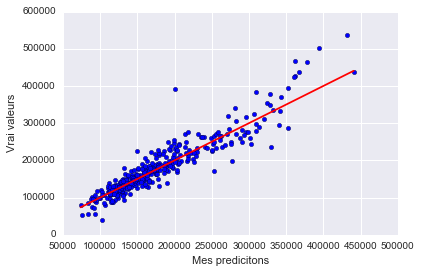

In [226]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

## yeah mixer 2 algos !!!

In [ ]:
model_ridge = Ridge(alpha=13.5, random_state=42)

In [233]:
mes_predictions_ridge = np.expm1(model_ridge.predict(X_validation_ridge))

In [234]:
mes_predictions_ridge[0:5]

array([  96823.69822388,  113956.87312754,  192531.99426733,
        131920.8609816 ,  142354.91206622])

In [235]:
mes_predictions_exp[0:5]

array([ 109968.10111552,  125796.22152704,  197819.32753382,
        132246.90615991,  132478.10448292])

In [237]:
resultat = pd.DataFrame({'ridge' : mes_predictions_ridge,
                       'tree' : mes_predictions_exp,
                       'realite' : y_validation_exp})

In [239]:
resultat['moyenne'] = (resultat.ridge+ resultat.tree) / 2.0
resultat.head()

,realite,ridge,tree,moyenne
140,115001.0,96823.698224,109968.101116,103395.899670
951,119901.0,113956.873128,125796.221527,119876.547327
248,180001.0,192531.994267,197819.327534,195175.660901
738,179001.0,131920.860982,132246.906160,132083.883571
569,135961.0,142354.912066,132478.104483,137416.508275


In [240]:
mean_absolute_error(resultat.realite, resultat.ridge)

13535.317184674073

In [241]:
mean_absolute_error(resultat.realite, resultat.tree)

18059.93165581434

In [242]:
mean_absolute_error(resultat.realite, resultat.moyenne)

13998.791706156873

### Importance des features dans un tree :

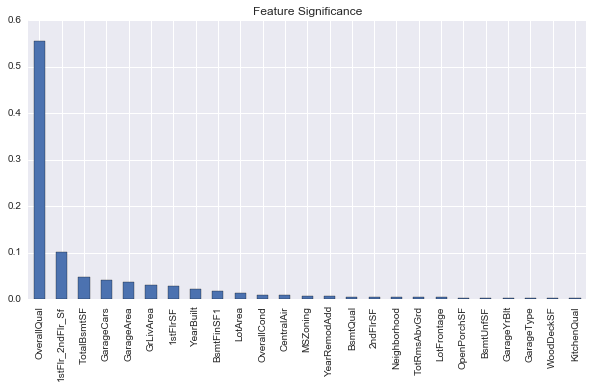

In [59]:
coef = pd.Series(rfr.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')